<a href="https://colab.research.google.com/github/abhaswanchu1/mids-207-final-project/blob/main/Abhas_Modelling_done.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Load in data from Google Drive
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive






# Importing

In [ ]:
import numpy as np
from scipy.sparse import load_npz
import tensorflow as tf
import matplotlib.pyplot as plt

path_dir = 'drive/MyDrive/'
# Load the .npz files
X_train_vectorized = np.load(path_dir+'X_train_vectorized.npy')
X_val_vectorized = np.load(path_dir+'X_val_vectorized.npy')
X_test_vectorized = np.load(path_dir+'X_test_vectorized.npy')

# Load the .npy files
y_train_binary = np.load(path_dir+'y_train_binary.npy')
y_val_binary = np.load(path_dir+'y_val_binary.npy')
y_test_binary = np.load(path_dir+'y_test_binary.npy')

In [ ]:
X_train_vectorized.shape, X_val_vectorized.shape, X_test_vectorized.shape

((31608, 500), (10536, 500), (10537, 500))

In [ ]:
y_train_binary.shape, y_val_binary.shape, y_test_binary.shape

((31608,), (10536,), (10537,))

In [ ]:
print(f"""Class Distributions
Training set - Normal: {np.sum(y_train_binary == 0)}, Abnormal: {np.sum(y_train_binary == 1)}
Validation set - Normal: {np.sum(y_val_binary == 0)}, Abnormal: {np.sum(y_val_binary == 1)}
""")
#0 is normal, 1 is abnormal

Class Distributions
Training set - Normal: 9697, Abnormal: 21911
Validation set - Normal: 3297, Abnormal: 7239



# Baseline Binary Model

Baseline Binary model with majority class as prediction

In [ ]:
#set baseline class = 1 to predict majority class
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
training_baseline_accuracy = accuracy_score(y_train_binary, np.ones(y_train_binary.shape))
validation_baseline_accuracy = accuracy_score(y_val_binary, np.ones(y_val_binary.shape))
print(f"""Baseline Accuracy
Training set: {training_baseline_accuracy}
Validation set: {validation_baseline_accuracy}
""")

# Print the classification report with weighted average F1 score
print(classification_report(y_test_binary, np.ones(y_test_binary.shape), target_names=['Normal', 'Abnormal'], zero_division=0))


Baseline Accuracy
Training set: 0.6932105796001012
Validation set: 0.6870728929384966

              precision    recall  f1-score   support

      Normal       0.00      0.00      0.00      3349
    Abnormal       0.68      1.00      0.81      7188

    accuracy                           0.68     10537
   macro avg       0.34      0.50      0.41     10537
weighted avg       0.47      0.68      0.55     10537



# Logistic Binary Classification

Logistic Binary Classification Model (Bag of Words)

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
#Create a better binary classification model
def build_binary_classification_model(input_shape):
  #housekeeping
  tf.keras.backend.clear_session()
  tf.random.set_seed(42)
  np.random.seed(42)
  #Build Model
  model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=input_shape),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
  ])
  #Compile Model
  model.compile(loss='binary_crossentropy',
                optimizer='adam',
                metrics=[tf.keras.metrics.F1Score()])
  return model

In [ ]:
def plot_history(history):
  plt.ylabel('F1-score')
  plt.xlabel('Epoch')
  plt.xticks(range(0, len(history['f1_score'] + 1)))
  plt.plot(history['f1_score'], label="training", marker='o')
  plt.plot(history['val_f1_score'], label="validation", marker='o')
  plt.ylim(0,1)
  plt.legend()
  plt.show()

In [ ]:
binary_model = build_binary_classification_model(input_shape=(X_train_vectorized.shape[1],))
y_train_binary = y_train_binary.reshape(-1, 1)
y_val_binary = y_val_binary.reshape(-1, 1)
y_train_binary = y_train_binary.astype('float32')  # Convert to float32
y_val_binary = y_val_binary.astype('float32')
history = binary_model.fit(X_train_vectorized, y_train_binary, epochs=5, validation_data=(X_val_vectorized, y_val_binary), verbose = 1)
binary_model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
988/988 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - f1_score: 0.8172 - loss: 4.2284 - val_f1_score: 0.8145 - val_loss: 0.5047
Epoch 2/5
988/988 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - f1_score: 0.8188 - loss: 0.4918 - val_f1_score: 0.8145 - val_loss: 0.4198
Epoch 3/5
988/988 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - f1_score: 0.8188 - loss: 0.4485 - val_f1_score: 0.8145 - val_loss: 0.4163
Epoch 4/5
988/988 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - f1_score: 0.8188 - loss: 0.4190 - val_f1_score: 0.8144 - val_loss: 0.4315
Epoch 5/5
988/988 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - f1_score: 0.8189 - loss: 0.4057 - val_f1_score: 0.8145 - val_loss: 0.4057


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 128)                 │          64,128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 223,493 (873.02 KB)

 Trainable params: 74,497 (291.00 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 148,996 (582.02 KB)

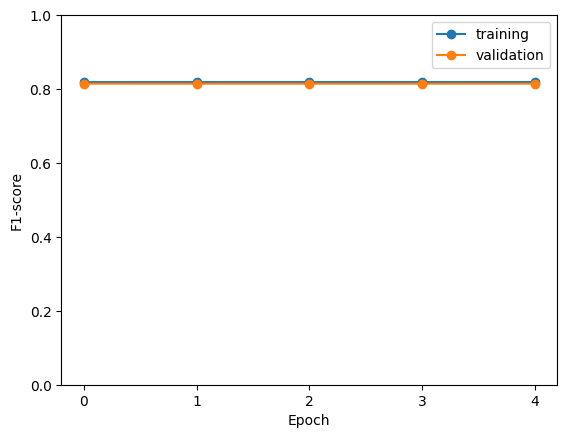

In [ ]:
import pandas as pd
history = pd.DataFrame(history.history)
plot_history(history)

In [ ]:
y_preds_binary = binary_model.predict(X_test_vectorized)
y_preds_binary = (y_preds_binary > 0.5).astype(int)
print(classification_report(y_test_binary, y_preds_binary, target_names=['Normal', 'Abnormal'], zero_division=0))


330/330 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step
              precision    recall  f1-score   support

      Normal       0.78      0.73      0.75      3349
    Abnormal       0.88      0.90      0.89      7188

    accuracy                           0.85     10537
   macro avg       0.83      0.82      0.82     10537
weighted avg       0.85      0.85      0.85     10537



In [ ]:
!pip install keras-tuner
!pip install tensorflow-addons


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 611.8/611.8 kB 12.4 MB/s eta 0:00:00
  Attempting uninstall: typeguard
    Found existing installation: typeguard 4.4.1
    Uninstalling typeguard-4.4.1:
      Successfully uninstalled typeguard-4.4.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
inflect 7.4.0 requires typeguard>=4.0.1, but you have typeguard 2.13.3 which is incompatible.


# Tuning Logistic Binay Model

In [ ]:
import keras_tuner as kt

In [ ]:
def model_builder(hp):
    tf.keras.backend.clear_session()
    tf.random.set_seed(42)
    np.random.seed(42)

    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Dense(
        units=hp.Int('units_1', min_value=32, max_value=512, step=32),
        activation='relu', input_shape=(X_train_vectorized.shape[1],)))

    # Add a variable number of hidden layers
    for i in range(hp.Int('num_layers', 1, 5)): # 1 to 5 hidden layers
        model.add(tf.keras.layers.Dense(
            units=hp.Int(f'units_{i+2}', min_value=32, max_value=512, step=32),
            activation='relu'))

    model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

    # Tune the learning rate for the optimizer
    hp_learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])
    model.compile(loss='binary_crossentropy',
                  optimizer=tf.keras.optimizers.Adam(learning_rate=hp_learning_rate),
                  metrics=['f1_score'])
    return model

# Create a Keras Tuner instance (e.g., RandomSearch)
tuner = kt.RandomSearch(
    model_builder,
    objective=kt.Objective("val_f1_score", direction="max"), # Objective to optimize
    max_trials=5, # Number of different model configurations to try
    executions_per_trial=3, # Number of times to train each model
    directory='my_dir', # Directory to save results
    project_name='binary_classification',
    overwrite = True)

# Reshape target variables
#y_train_binary = y_train_binary.reshape(-1, 1)
#y_val_binary = y_val_binary.reshape(-1, 1)

# Search for the best hyperparameters
tuner.search(X_train_vectorized, y_train_binary, epochs=3, validation_data=(X_val_vectorized, y_val_binary))

# Get the best model
best_binary_model = tuner.get_best_models(num_models=1)[0]

history = best_binary_model.fit(X_train_vectorized, y_train_binary, epochs=2, validation_data=(X_val_vectorized, y_val_binary))


Trial 5 Complete [00h 00m 55s]
val_f1_score: 0.814514696598053

Best val_f1_score So Far: 0.8184042374293009
Total elapsed time: 00h 04m 28s
Epoch 1/2


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


988/988 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - f1_score: 0.8317 - loss: 1.4274 - val_f1_score: 0.8186 - val_loss: 2.1720
Epoch 2/2
988/988 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - f1_score: 0.8293 - loss: 1.0403 - val_f1_score: 0.8195 - val_loss: 1.9301


In [ ]:
X_test_vectorized = X_test_vectorized.astype(np.float32)  # If X_test_vectorized is not float32
X_test_vectorized = X_test_vectorized.reshape(-1, X_train_vectorized.shape[1])

# Ensure y_test_binary has the correct shape
y_test_binary = y_test_binary.astype(np.float32) # If y_test_binary is not float32
y_test_binary = y_test_binary.reshape(-1, 1)

In [ ]:
y_preds_binary = best_binary_model.predict(X_test_vectorized)
y_preds_binary = (y_preds_binary > 0.5).astype(int)
print(classification_report(y_test_binary, y_preds_binary, target_names=['Normal', 'Abnormal'], zero_division=0))


330/330 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step
              precision    recall  f1-score   support

      Normal       0.65      0.82      0.72      3349
    Abnormal       0.90      0.79      0.84      7188

    accuracy                           0.80     10537
   macro avg       0.78      0.81      0.78     10537
weighted avg       0.82      0.80      0.81     10537



Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 512)                 │         256,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 320)                 │         164,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 416)                 │         133,536 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │             417 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,663,877 (6.35 MB)

 Trainable params: 554,625 (2.12 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,109,252 (4.23 MB)

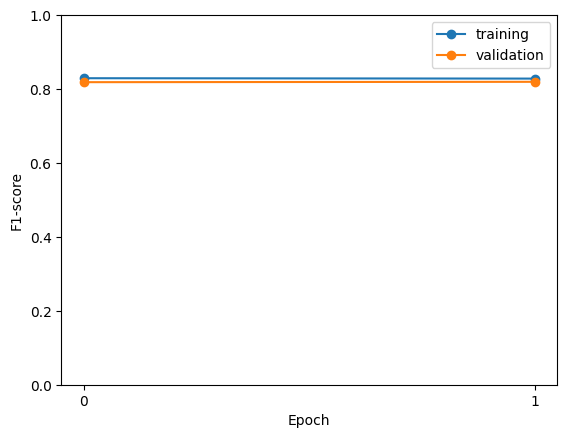

In [ ]:
best_binary_model.summary()
history = pd.DataFrame(history.history)
plot_history(history)

In [ ]:
#tf.keras.utils.plot_model(best_binary_model, show_shapes=True)


# Binary Classification LSTM Model with Embeddings

LSTM Model with Embeddings

Epoch 1/2


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


988/988 ━━━━━━━━━━━━━━━━━━━━ 46s 41ms/step - f1_score: 0.8188 - loss: 0.6224 - val_f1_score: 0.8145 - val_loss: 0.6218
Epoch 2/2
988/988 ━━━━━━━━━━━━━━━━━━━━ 40s 41ms/step - f1_score: 0.8188 - loss: 0.6181 - val_f1_score: 0.8145 - val_loss: 0.6217


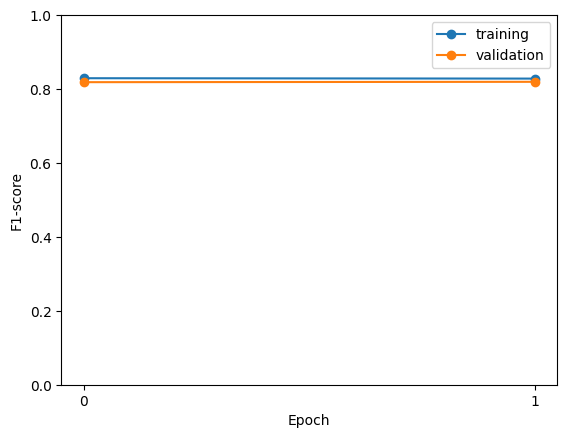

In [ ]:
#Let's build an LSTM model with embeddings next
def build_lstm_model_with_embeddings(vocab_size, embedding_dim, optimizer,input_length):
   tf.keras.backend.clear_session()
   tf.random.set_seed(42)
   np.random.seed(42)
   model = tf.keras.Sequential([
       tf.keras.layers.Embedding(input_dim = vocab_size, output_dim=embedding_dim, input_length=input_length),
       tf.keras.layers.LSTM(128, return_sequences=True),
       tf.keras.layers.Dropout(0.2),
       tf.keras.layers.LSTM(64),
       tf.keras.layers.Dropout(0.2),
       tf.keras.layers.Dense(1, activation='sigmoid')
   ])

   model.compile(loss='binary_crossentropy',
                 optimizer=optimizer,
                 metrics=['f1_score'])
   return model

vocab_size = 10000
embedding_dim = 128
optimizer = 'adam'
input_length = X_train_vectorized.shape[1]
lstm_model_with_embeddings = build_lstm_model_with_embeddings(vocab_size, embedding_dim, optimizer,input_length)
history_1 = lstm_model_with_embeddings.fit(X_train_vectorized, y_train_binary, epochs=2, validation_data=(X_val_vectorized, y_val_binary))
history_1 = pd.DataFrame(history_1.history)
lstm_model = build_lstm_model_with_embeddings(vocab_size, embedding_dim,optimizer, input_length)
plot_history(history)

In [ ]:
y_preds_binary = lstm_model_with_embeddings.predict(X_test_vectorized)
y_preds_binary = (y_preds_binary > 0.5).astype(int)
print(classification_report(y_test_binary, y_preds_binary, target_names=['Normal', 'Abnormal'], zero_division=0))


330/330 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step
              precision    recall  f1-score   support

      Normal       0.00      0.00      0.00      3349
    Abnormal       0.68      1.00      0.81      7188

    accuracy                           0.68     10537
   macro avg       0.34      0.50      0.41     10537
weighted avg       0.47      0.68      0.55     10537



# Tuning LSTM Binary Model

In [ ]:
#!pip install scikeras
#!pip install scikit-learn

In [ ]:
def lstm_model_builder(hp):
    tf.keras.backend.clear_session()
    tf.random.set_seed(42)
    np.random.seed(42)

    # Tune the vocabulary size
    vocab_size = hp.Int('vocab_size', min_value=500, max_value=20000, step=500)

    # Tune the embedding dimension
    embedding_dim = hp.Int('embedding_dim', min_value=64, max_value=256, step=64)

    # Tune the number of LSTM units
    lstm_units_1 = hp.Int('lstm_units_1', min_value=64, max_value=256, step=64)
    lstm_units_2 = hp.Int('lstm_units_2', min_value=32, max_value=128, step=32)

    # Tune the dropout rate
    dropout_rate = hp.Float('dropout_rate', min_value=0.1, max_value=0.5, step=0.1)

    # Tune the learning rate
    hp_learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])

    model = tf.keras.Sequential([
        tf.keras.layers.Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=X_train_vectorized.shape[1]),
        tf.keras.layers.LSTM(lstm_units_1, return_sequences=True),
        tf.keras.layers.Dropout(dropout_rate),
        tf.keras.layers.LSTM(lstm_units_2),
        tf.keras.layers.Dropout(dropout_rate),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])

    model.compile(loss='binary_crossentropy',
                  optimizer=tf.keras.optimizers.Adam(learning_rate=hp_learning_rate),
                  metrics=['f1_score'])

    return model

# Create a Keras Tuner instance (e.g., RandomSearch)
tuner = kt.RandomSearch(
    lstm_model_builder,
    objective='val_f1_score', # Objective to optimize
    max_trials=3, # Number of different model configurations to try
    executions_per_trial=3, # Number of times to train each model
    directory='my_dir', # Directory to save results
    project_name='lstm_binary_classification')

# Search for the best hyperparameters
tuner.search(X_train_vectorized, y_train_binary, epochs=3, validation_data=(X_val_vectorized, y_val_binary))

# Get the best model
best_lstm_model = tuner.get_best_models(num_models=1)[0]

Trial 5 Complete [00h 06m 42s]
val_f1_score: 0.814514696598053

Best val_f1_score So Far: 0.814514696598053
Total elapsed time: 00h 31m 23s


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 20 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [ ]:
y_preds_binary = best_lstm_model.predict(X_test_vectorized)
y_preds_binary = (y_preds_binary > 0.5).astype(int)
print(classification_report(y_test_binary, y_preds_binary, target_names=['Normal', 'Abnormal'], zero_division=0))


330/330 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step
              precision    recall  f1-score   support

      Normal       0.00      0.00      0.00      3349
    Abnormal       0.68      1.00      0.81      7188

    accuracy                           0.68     10537
   macro avg       0.34      0.50      0.41     10537
weighted avg       0.47      0.68      0.55     10537



# Baseline Multi-Class Logistic Model

Next: Baseline Multi-class Classification
Let's use a simple logistic regression with a couple densely connected layers.


In [ ]:
y_train_multi = np.load(path_dir+'y_train_multi.npy')
y_val_multi = np.load(path_dir+'y_val_multi.npy')
y_test_multi = np.load(path_dir+'y_test_multi.npy')

In [ ]:
#one-hot encode y_train_multi, y_val_multi and y_test_multi
#should have 7 classes
from sklearn.preprocessing import OneHotEncoder
y_train_multi_one_hot = tf.keras.utils.to_categorical(y_train_multi, num_classes=7)
y_val_multi_one_hot = tf.keras.utils.to_categorical(y_val_multi, num_classes=7)
y_test_multi_one_hot = tf.keras.utils.to_categorical(y_test_multi, num_classes=7)

In [ ]:
y_train_multi_one_hot.shape, y_val_multi_one_hot.shape, y_test_multi_one_hot.shape


((31608, 7), (10536, 7), (10537, 7))

In [ ]:
y_train_multi_one_hot[0] #confirm it's one-hot encoded

array([0., 0., 0., 1., 0., 0., 0.])

In [ ]:

def build_multi_class_logistic_model(input_shape):
  tf.keras.backend.clear_session()
  tf.random.set_seed(42)
  np.random.seed(42)
  model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=input_shape),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(7, activation='softmax')
  ])
  model.compile(loss='categorical_crossentropy',
                optimizer='adam',
                metrics=['f1_score'])
  return model

multi_class_baseline_model = build_multi_class_logistic_model(input_shape=(X_train_vectorized.shape[1],))
history_2 = multi_class_baseline_model.fit(X_train_vectorized, y_train_multi_one_hot, epochs=5, validation_data=(X_val_vectorized, y_val_multi_one_hot), verbose = 1)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
988/988 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - f1_score: 0.1420 - loss: 26.0366 - val_f1_score: 0.1137 - val_loss: 1.6401
Epoch 2/5
988/988 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - f1_score: 0.1289 - loss: 1.6139 - val_f1_score: 0.1461 - val_loss: 1.5662
Epoch 3/5
988/988 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - f1_score: 0.1382 - loss: 1.5797 - val_f1_score: 0.1446 - val_loss: 1.5671
Epoch 4/5
988/988 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - f1_score: 0.1421 - loss: 1.5592 - val_f1_score: 0.1340 - val_loss: 1.5601
Epoch 5/5
988/988 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - f1_score: 0.1647 - loss: 1.5095 - val_f1_score: 0.1799 - val_loss: 1.4634


In [ ]:
from sklearn.metrics import f1_score
y_val_pred = multi_class_baseline_model.predict(X_val_vectorized)
y_val_multi_true = np.argmax(y_val_multi_one_hot, axis=1)
y_val_pred_multi = np.argmax(y_val_pred, axis=1)

print(classification_report(y_val_multi_true,y_val_pred_multi)),


330/330 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
              precision    recall  f1-score   support

           0       1.00      0.00      0.00       726
           1       0.00      0.00      0.00       554
           2       0.37      0.94      0.53      3098
           3       0.83      0.65      0.73      3297
           4       0.00      0.00      0.00       228
           5       0.00      0.00      0.00       544
           6       0.00      0.00      0.00      2089

    accuracy                           0.48     10536
   macro avg       0.31      0.23      0.18     10536
weighted avg       0.44      0.48      0.38     10536



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


(None,)

In [ ]:
print(f1_score(y_val_multi_true, y_val_pred_multi, average='weighted'))

0.38345375794824144


# Tuning Multi-class Logistic Model

Tuning multi-class model

In [ ]:
import keras_tuner as kt

def model_builder(hp):
    tf.keras.backend.clear_session()
    tf.random.set_seed(42)
    np.random.seed(42)

    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Dense(
        units=hp.Int('units_1', min_value=32, max_value=512, step=32),
        activation='relu', input_shape=(X_train_vectorized.shape[1],)))

    # Add a variable number of hidden layers
    for i in range(hp.Int('num_layers', 1, 5)):  # 1 to 5 hidden layers
        model.add(tf.keras.layers.Dense(
            units=hp.Int(f'units_{i+2}', min_value=32, max_value=512, step=32),
            activation='relu'))

    model.add(tf.keras.layers.Dense(7, activation='softmax'))  # Output layer for 7 classes

    # Tune the learning rate for the optimizer
    hp_learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])
    model.compile(loss='categorical_crossentropy',
                  optimizer=tf.keras.optimizers.Adam(learning_rate=hp_learning_rate),
                  metrics=[tf.keras.metrics.F1Score(name='f1_score', average='weighted')])  # Use weighted F1-score
    return model

tuner = kt.RandomSearch(
    model_builder,
    objective=kt.Objective('val_f1_score', direction = 'max'),  # Objective to optimize (weighted F1-score)
    max_trials=5,  # Number of different model configurations to try
    executions_per_trial=3,  # Number of times to train each model
    directory='my_dir',  # Directory to save results
    project_name='multi_class_classification')


tuner.search(X_train_vectorized, y_train_multi_one_hot, epochs=5, validation_data=(X_val_vectorized, y_val_multi_one_hot))

# Get the best model
best_multi_class_logistic_model = tuner.get_best_models(num_models=1)[0]

Trial 10 Complete [00h 01m 27s]
val_accuracy: 0.513762354850769

Best val_accuracy So Far: 0.513762354850769
Total elapsed time: 00h 12m 02s


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 26 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [ ]:
from sklearn.metrics import f1_score
y_val_pred = best_multi_class_logistic_model.predict(X_val_vectorized)
y_val_pred_multi = np.argmax(y_val_pred, axis=1)
y_val_multi_true = np.argmax(y_val_multi_one_hot, axis=1)
print(classification_report(y_val_multi_true,y_val_pred_multi))
print(f1_score(y_val_multi_true, y_val_pred_multi, average='weighted'))

330/330 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step
              precision    recall  f1-score   support

           0       0.14      0.01      0.03       726
           1       0.09      0.01      0.01       554
           2       0.41      0.80      0.54      3098
           3       0.69      0.89      0.77      3297
           4       0.67      0.01      0.02       228
           5       0.33      0.01      0.01       544
           6       0.33      0.03      0.05      2089

    accuracy                           0.52     10536
   macro avg       0.38      0.25      0.20     10536
weighted avg       0.45      0.52      0.41     10536

0.41494973045167666


In [ ]:
X_train_bow = np.load(path_dir+'X_train_bow.npz')['data']
X_val_bow = np.load(path_dir+'X_val_bow.npz')['data']
X_test_bow = np.load(path_dir+'X_test_bow.npz')['data']




# Simple Logistic Baseline Multi-class Model

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score

# Initialize the model
baseline_multi_model = LogisticRegression(max_iter=1000, multi_class='multinomial')

# Fit the model
baseline_multi_model.fit(X_train_vectorized, y_train_multi)

# Make predictions on validation data
y_val_pred = baseline_multi_model.predict(X_val_vectorized)

# Calculate the weighted F1 score
val_f1 = f1_score(y_val_multi, y_val_pred, average='weighted')
print(f"Validation F1 Score: {val_f1}")

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Validation F1 Score: 0.38264309055779505


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# Tune Simple Logistic Regression Baseline Multi-Class Model

In [ ]:
import keras_tuner as kt
from scikeras.wrappers import KerasClassifier
from sklearn.linear_model import LogisticRegression
import tensorflow as tf
from sklearn.metrics import f1_score
from tensorflow import keras
from tensorflow.keras import layers

# Define the model-building function for Keras Tuner
def build_logistic_regression_model(hp):
    """
    Builds a Keras model for logistic regression with hyperparameter tuning.

    Args:
        hp: HyperParameters object.

    Returns:
        A compiled Keras model.
    """
    model = keras.Sequential([
        layers.Dense(
            units=hp.Int('units', min_value=32, max_value=512, step=32),
            activation='relu',
            input_shape=(X_train_vectorized.shape[1],)  # Input shape
        ),
        layers.Dense(7, activation='softmax')  # Output layer with 7 units (for 7 classes)
    ])

    model.compile(
        optimizer=keras.optimizers.Adam(
            hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])
        ),
        loss='categorical_crossentropy',
        metrics=[tf.keras.metrics.F1Score(name='f1_score', average='weighted')]
    )
    return model

# Create a Keras Tuner instance (e.g., RandomSearch)
tuner = kt.RandomSearch(
    build_logistic_regression_model,
    objective=kt.Objective("val_f1_score", direction="max"),  # Optimize weighted F1-score
    max_trials=5,  # Number of different model configurations to try
    executions_per_trial=3,  # Number of times to train each model
    directory='my_dir',  # Directory to save results
    project_name='logistic_regression_tuning'
)

# Search for the best hyperparameters
tuner.search(X_train_vectorized, y_train_multi_one_hot, epochs=5, validation_data=(X_val_vectorized, y_val_multi_one_hot))

# Get the best model
best_model = tuner.get_best_models(num_models=1)[0]

# Evaluate the best model on the validation data
y_val_pred = best_model.predict(X_val_vectorized)
y_val_pred_multi = np.argmax(y_val_pred, axis=1)
y_val_multi_true = np.argmax(y_val_multi_one_hot, axis=1)
val_f1 = f1_score(y_val_multi_true, y_val_pred_multi, average='weighted')
print(f"Validation F1 Score (Best Model): {val_f1}")

Trial 5 Complete [00h 00m 46s]
val_f1_score: 0.3708687524000804

Best val_f1_score So Far: 0.3708687524000804
Total elapsed time: 00h 06m 32s


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 10 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


330/330 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Validation F1 Score (Best Model): 0.3823648354486972


# LSTM Model for multi-class with embeddings

In [ ]:
#build LSTM model for multi-class classification

def build_lstm_multi_class_model(vocab_size, embedding_dim, optimizer,input_length):
  tf.keras.backend.clear_session()
  tf.random.set_seed(42)
  np.random.seed(42)
  model = tf.keras.Sequential([
        tf.keras.layers.Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=input_length),
        tf.keras.layers.LSTM(128, return_sequences=True),  # Return sequences for next LSTM layer
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.LSTM(64),  # Another LSTM layer
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(7, activation='softmax')  # Output layer for 7 classes
    ])

  model.compile(loss='categorical_crossentropy',  # Loss for multi-class
                  optimizer=optimizer,
                  metrics=['f1_score'])  # You can add F1 score here if needed
  return model

vocab_size = 10000  # Adjust based on your vocabulary size
embedding_dim = 128  # Adjust as needed
optimizer = 'adam'  # You can try other optimizers
input_length = X_train_vectorized.shape[1]

# Create the model
lstm_multi_class_model = build_lstm_multi_class_model(vocab_size, embedding_dim, optimizer, input_length)

# Train the model
history = lstm_multi_class_model.fit(
    X_train_vectorized, y_train_multi_one_hot,
    epochs=10,  # Adjust as needed
    validation_data=(X_val_vectorized, y_val_multi_one_hot),
    verbose=1  # Set to 1 for progress updates
)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


988/988 ━━━━━━━━━━━━━━━━━━━━ 42s 40ms/step - f1_score: 0.1155 - loss: 1.6477 - val_f1_score: 0.0685 - val_loss: 1.6245
Epoch 2/10
988/988 ━━━━━━━━━━━━━━━━━━━━ 40s 40ms/step - f1_score: 0.1043 - loss: 1.6266 - val_f1_score: 0.0699 - val_loss: 1.6243
Epoch 3/10
988/988 ━━━━━━━━━━━━━━━━━━━━ 40s 40ms/step - f1_score: 0.1028 - loss: 1.6255 - val_f1_score: 0.0699 - val_loss: 1.6244
Epoch 4/10
988/988 ━━━━━━━━━━━━━━━━━━━━ 40s 40ms/step - f1_score: 0.1008 - loss: 1.6256 - val_f1_score: 0.0700 - val_loss: 1.6233
Epoch 5/10
988/988 ━━━━━━━━━━━━━━━━━━━━ 40s 40ms/step - f1_score: 0.0998 - loss: 1.6243 - val_f1_score: 0.0700 - val_loss: 1.6225
Epoch 6/10
988/988 ━━━━━━━━━━━━━━━━━━━━ 40s 40ms/step - f1_score: 0.0978 - loss: 1.6244 - val_f1_score: 0.0702 - val_loss: 1.6221
Epoch 7/10
988/988 ━━━━━━━━━━━━━━━━━━━━ 40s 40ms/step - f1_score: 0.1077 - loss: 1.6234 - val_f1_score: 0.0699 - val_loss: 1.6240
Epoch 8/10
988/988 ━━━━━━━━━━━━━━━━━━━━ 40s 41ms/step - f1_score: 0.1022 - loss: 1.6267 - val_f1_scor

In [ ]:
y_pred_probs = lstm_multi_class_model.predict(X_test_vectorized)
y_pred_classes = np.argmax(y_pred_probs, axis=1)  # Get predicted class labels
y_val_pred_classes = np.argmax(y_val_pred, axis=1)  # Get predicted class labels for validation data
y_val_multi_true = np.argmax(y_val_multi_one_hot, axis=1)
# Evaluate using classification report
print(f1_score(y_val_multi_true, y_val_pred_classes, average='weighted'))
print(classification_report(np.argmax(y_test_multi_one_hot, axis=1), y_pred_classes))
print(f1_score(np.argmax(y_test_multi_one_hot, axis=1), y_pred_classes, average='weighted'))
print(classification_report(np.argmax(y_test_multi_one_hot, axis=1), y_pred_classes))


330/330 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step
0.3823648354486972
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       776
           1       0.00      0.00      0.00       537
           2       0.67      0.01      0.01      3043
           3       0.32      1.00      0.48      3349
           4       0.00      0.00      0.00       200
           5       0.00      0.00      0.00       464
           6       0.00      0.00      0.00      2168

    accuracy                           0.32     10537
   macro avg       0.14      0.14      0.07     10537
weighted avg       0.29      0.32      0.16     10537

0.15739948964966521
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       776
           1       0.00      0.00      0.00       537
           2       0.67      0.01      0.01      3043
           3       0.32      1.00      0.48      3349
           4       0.00      0.00      0.00       2

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/m

# Tuning LSTM Model for Multi-class with embeddings

In [ ]:
import keras_tuner as kt

def lstm_model_builder(hp):
    tf.keras.backend.clear_session()
    tf.random.set_seed(42)
    np.random.seed(42)

    # Tune the vocabulary size
    vocab_size = hp.Int('vocab_size', min_value=5000, max_value=20000, step=5000)

    # Tune the embedding dimension
    embedding_dim = hp.Int('embedding_dim', min_value=64, max_value=256, step=64)

    # Tune the number of LSTM units
    lstm_units_1 = hp.Int('lstm_units_1', min_value=64, max_value=256, step=64)
    lstm_units_2 = hp.Int('lstm_units_2', min_value=32, max_value=128, step=32)

    # Tune the dropout rate
    dropout_rate = hp.Float('dropout_rate', min_value=0.1, max_value=0.5, step=0.1)

    # Tune the learning rate
    hp_learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])

    model = tf.keras.Sequential([
        tf.keras.layers.Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=X_train_vectorized.shape[1]),
        tf.keras.layers.LSTM(lstm_units_1, return_sequences=True),
        tf.keras.layers.Dropout(dropout_rate),
        tf.keras.layers.LSTM(lstm_units_2),
        tf.keras.layers.Dropout(dropout_rate),
        tf.keras.layers.Dense(7, activation='softmax')  # Output layer for 7 classes
    ])

    model.compile(loss='categorical_crossentropy',
                  optimizer=tf.keras.optimizers.Adam(learning_rate=hp_learning_rate),
                  metrics=[tf.keras.metrics.F1Score(name='f1_score', average='weighted')])

    return model

tuner = kt.RandomSearch(
    lstm_model_builder,
    objective='val_f1_score',  # Objective to optimize
    max_trials=3,  # Number of different model configurations to try
    executions_per_trial=3,  # Number of times to train each model
    directory='my_dir',  # Directory to save results
    project_name='lstm_multi_class_tuning'
)

tuner.search(X_train_vectorized, y_train_multi_one_hot, epochs=10, validation_data=(X_val_vectorized, y_val_multi_one_hot))
best_lstm_model = tuner.get_best_models(num_models=1)[0]


Trial 5 Complete [00h 20m 31s]
val_f1_score: 0.14599908888339996

Best val_f1_score So Far: 0.14599908888339996
Total elapsed time: 01h 13m 02s


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 20 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [ ]:
y_pred_probs = best_lstm_model.predict(X_test_vectorized)
y_pred_classes = np.argmax(y_pred_probs, axis=1)
y_true_classes = np.argmax(y_test_multi_one_hot, axis=1)
print(f1_score(y_true_classes, y_pred_classes, average='weighted'))
print(classification_report(y_true_classes, y_pred_classes))

330/330 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step
0.1289766668542344
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       776
           1       0.00      0.00      0.00       537
           2       0.29      1.00      0.45      3043
           3       0.00      0.00      0.00      3349
           4       0.00      0.00      0.00       200
           5       0.00      0.00      0.00       464
           6       0.00      0.00      0.00      2168

    accuracy                           0.29     10537
   macro avg       0.04      0.14      0.06     10537
weighted avg       0.08      0.29      0.13     10537



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
